<a href="https://colab.research.google.com/github/Nazish5/iris_classification/blob/main/irisclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data cleaning and preparation

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking duplicates

In [ ]:
df.duplicated().sum()


3

In [ ]:
df.drop_duplicates(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking categorical variables

In [ ]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


# EDA

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.describe(include=['object'])

,species
count,147
unique,3
top,Iris-versicolor
freq,50


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

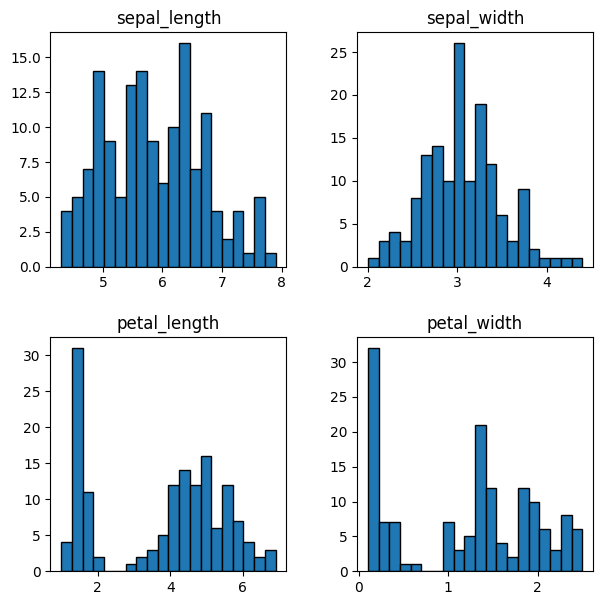

In [ ]:
df.hist(figsize=(7,7), bins=20 , edgecolor = "black" , grid=False)

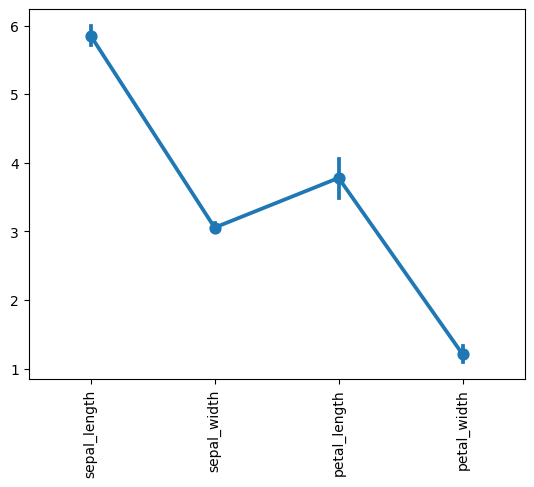

In [ ]:
sns.pointplot(df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

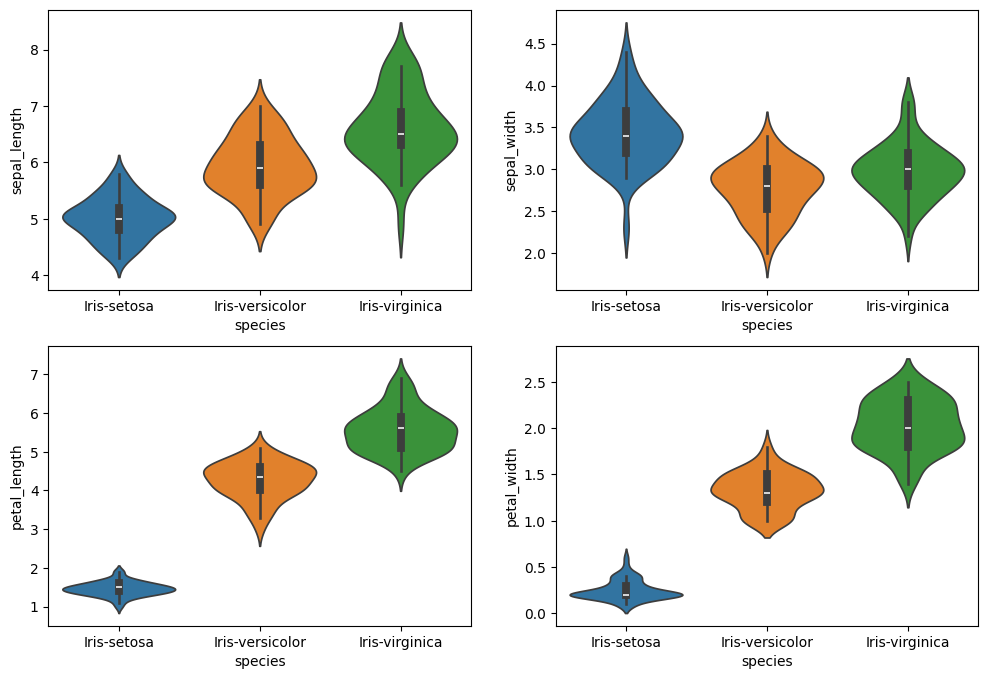

In [ ]:
plt.figure(figsize=(12,8))
sns.load_dataset("iris")

plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df,hue='species')

plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df,hue= 'species')

plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df,hue='species')

plt.subplot(2,2,4)
sns.violinplot(x='species',y = 'petal_width',data=df,hue='species')

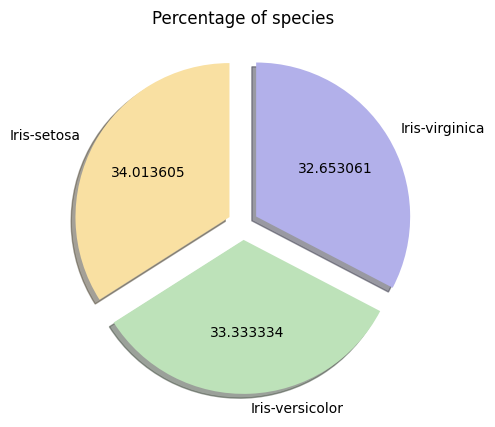

In [ ]:
fig = plt.figure(figsize=(5,5))
labels =df['species'].unique()
percent =df['species'].value_counts()
color =['#F9E0A2', '#BDE2B9', '#B2B0EA']
plt.pie(percent,labels=labels,startangle=90,shadow=True,explode= (0.1,0.1,0.1),colors=color,autopct='%2f')
plt.title('Percentage of species')
plt.show()

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

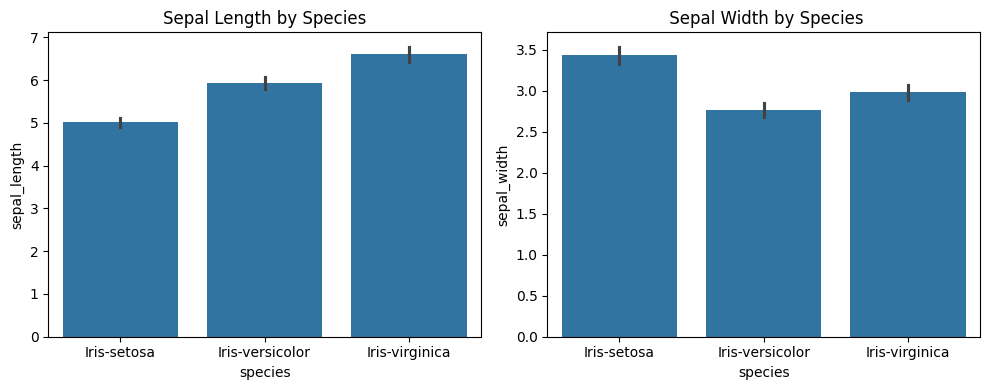

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(ax=axes[0], x='species', y='sepal_length', data=df)
axes[0].set_title("Sepal Length by Species")

sns.barplot(ax=axes[1], x='species', y='sepal_width', data=df)
axes[1].set_title(" Sepal Width by Species")

plt.tight_layout()
plt.show()

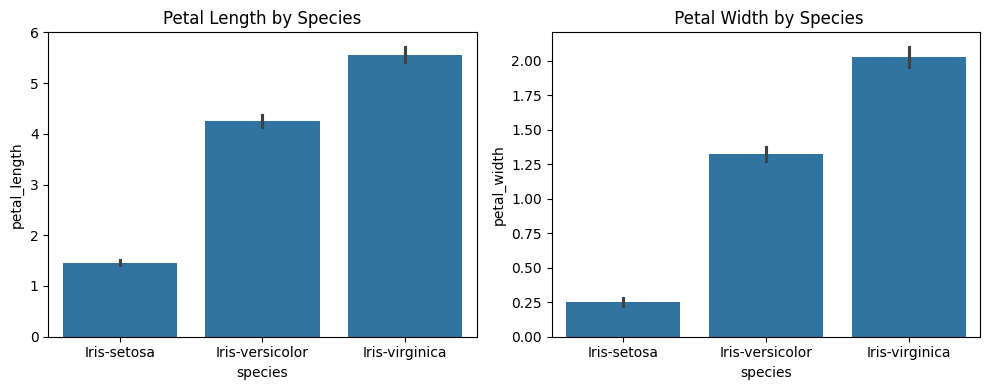

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(ax=axes[0], x='species', y='petal_length', data=df)
axes[0].set_title("Petal Length by Species")

sns.barplot(ax=axes[1], x='species', y='petal_width', data=df)
axes[1].set_title(" Petal Width by Species")

plt.tight_layout()
plt.show()

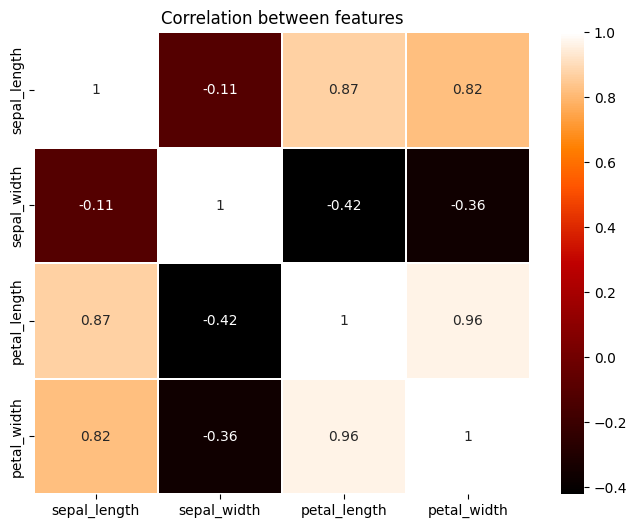

In [ ]:
# Remove the 'species' column from the DataFrame before calculating correlation.
df.drop('species', axis=1)

plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(),annot=True, cmap='gist_heat',linewidths=0.3)
plt.title("Correlation between features")
plt.show()